In [1]:
import os
import numpy as np
import cv2
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
directory = "TImages/"

In [3]:
image_size = (244, 244)
classes = ["0", "1", "2"]

In [4]:
# Create an ImageDataGenerator instance with data augmentation settings
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)


In [43]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(directory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, image_size)

                # Generate and store augmented images
                augmented_images = []
                augmented_images.append(new_array)  # Original image
                img_array_aug = new_array.reshape((1,) + new_array.shape)
                i = 0
                for batch in datagen.flow(img_array_aug, batch_size=1):
                    augmented_images.append(batch[0])
                    i += 1
                    if i >= 3:  # Generate 2 augmented images per input image
                        break

                for augmented_image in augmented_images:
                    image_hsv = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2HSV)
                    training_data.append([image_hsv, class_num])

            except Exception as e:
                pass

In [44]:
create_training_data()

In [45]:
lenofimage = len(training_data)
print(lenofimage)

3900


In [46]:
# Shuffle the training data to ensure randomness
np.random.shuffle(training_data)

In [47]:
# Separate images (X) and labels (y)
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

In [48]:
X = X / 255.0

In [49]:
# Print the shapes to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (3900, 244, 244, 3)
Shape of y: (3900,)


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [53]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(244, 244, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Increased dropout rate for regularization
model.add(Dense(len(classes), activation='softmax'))

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [56]:
# Define a learning rate schedule
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 30:
        return 0.0005
    else:
        return 0.0001

In [57]:
# Create callbacks for early stopping and learning rate schedule
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

In [58]:
# Train the model with callbacks for 50 epochs
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

Epoch 1/10
98/98 [==============================] - 202s 2s/step - loss: 0.4070 - accuracy: 0.9260 - val_loss: 0.2245 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 2/10
98/98 [==============================] - 101s 1s/step - loss: 0.2072 - accuracy: 0.9353 - val_loss: 0.2016 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 3/10
98/98 [==============================] - 105s 1s/step - loss: 0.1779 - accuracy: 0.9452 - val_loss: 0.2151 - val_accuracy: 0.9551 - lr: 0.0010
Epoch 4/10
98/98 [==============================] - 120s 1s/step - loss: 0.1604 - accuracy: 0.9551 - val_loss: 0.2012 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 5/10
98/98 [==============================] - 120s 1s/step - loss: 0.1130 - accuracy: 0.9699 - val_loss: 0.2402 - val_accuracy: 0.9436 - lr: 0.0010
Epoch 6/10
98/98 [==============================] - 119s 1s/step - loss: 0.0766 - accuracy: 0.9792 - val_loss: 0.2528 - val_accuracy: 0.9500 - lr: 5.0000e-04
Epoch 7/10
98/98 [==============================] - 119s 1s/step - loss:

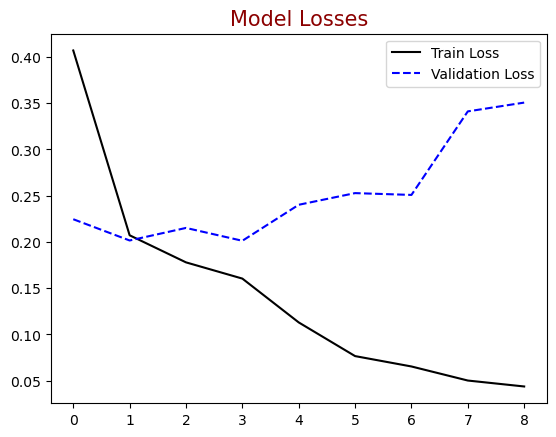

In [59]:

import matplotlib.pyplot as plt
#Plotting train & validation loss
plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"],label = "Validation Loss", color = "blue", linestyle="dashed")
plt.title("Model Losses", color = "darkred", size = 15)
plt.legend()
plt.show()

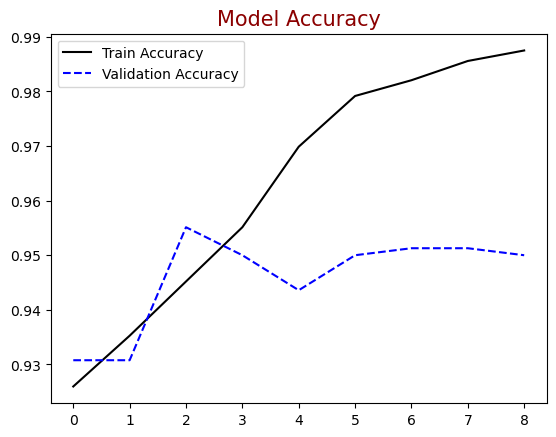

In [60]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(history .history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(history .history["val_accuracy"],label = "Validation Accuracy", color = "blue", linestyle="dashed")
plt.title("Model Accuracy", color = "darkred", size = 15)
plt.legend()
plt.show()

In [19]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
147/147 [==============================] - 166s 1s/step - loss: 0.0114 - accuracy: 0.9974 - val_loss: 0.9812 - val_accuracy: 0.9479
Epoch 2/25
147/147 [==============================] - 171s 1s/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.9303 - val_accuracy: 0.9427
Epoch 3/25
147/147 [==============================] - 185s 1s/step - loss: 0.0269 - accuracy: 0.9983 - val_loss: 1.5585 - val_accuracy: 0.9479
Epoch 4/25
147/147 [==============================] - 185s 1s/step - loss: 0.0098 - accuracy: 0.9962 - val_loss: 1.4448 - val_accuracy: 0.9479
Epoch 5/25
147/147 [==============================] - 181s 1s/step - loss: 0.0079 - accuracy: 0.9970 - val_loss: 1.1406 - val_accuracy: 0.9453
Epoch 6/25
147/147 [==============================] - 197s 1s/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 1.1445 - val_accuracy: 0.9504
Epoch 7/25
147/147 [==============================] - 213s 1s/step - loss: 0.0710 - accuracy: 0.9908 - val_loss: 1.6657 - val_accuracy: 0.9436

In [21]:
import matplotlib.pyplot as plt

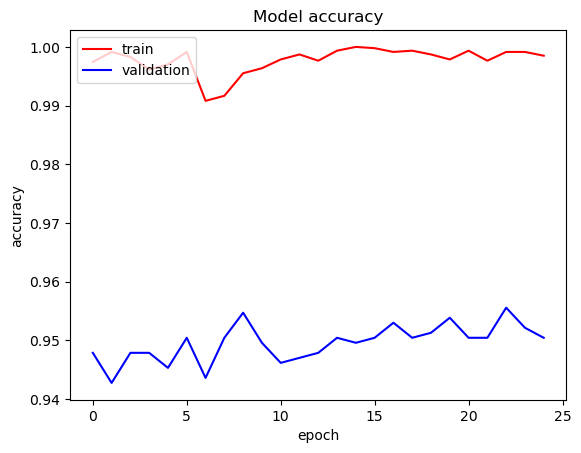

In [22]:
# displaying the model accuracy
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

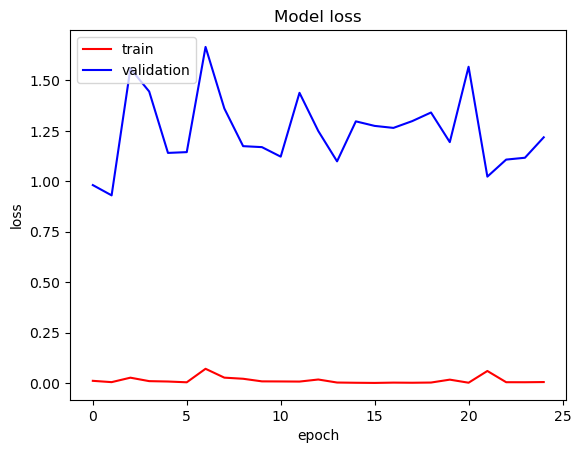

In [23]:
# displaying the model loss
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [61]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 121, 121, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 119, 119, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 59, 59, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 222784)            0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [63]:
from tensorflow.keras.models import Model

# Create a new model that extracts features from the last convolutional layer
feature_extraction_model = Model(inputs=model.input, outputs=model.get_layer('flatten_2').output)

# Extract features from your dataset
X_train_features = feature_extraction_model.predict(X_train)
X_test_features = feature_extraction_model.predict(X_test)


25/25 [==============================] - 7s 291ms/step


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
# Feature Scaling
sc = StandardScaler()

X_train_ss = sc.fit_transform(X_train_features)
X_test_ss = sc.transform(X_test_features)

In [66]:
## for NAIVE BAYES

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [68]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-5] # You can adjust this range
    
}

In [69]:
nb = GaussianNB()

In [70]:
# Create the GridSearch object without cross-validation
grid_search = GridSearchCV(nb, param_grid, cv=5, verbose=2)  # Set cv=None for no cross-validation

In [71]:
grid_search.class_prior_ = [0.5, 0.5]

In [72]:
# Fit the GridSearch object to your data
grid_search.fit(X_train_ss, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................var_smoothing=1e-05; total time=  40.1s
[CV] END ................................var_smoothing=1e-05; total time=  40.0s
[CV] END ................................var_smoothing=1e-05; total time=  43.8s
[CV] END ................................var_smoothing=1e-05; total time=  38.5s
[CV] END ................................var_smoothing=1e-05; total time=  37.1s


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-05]}, verbose=2)

In [73]:
# Get the best estimator and evaluate it
best_nb = grid_search.best_estimator_
y_test_pred_nb = best_nb.predict(X_test_ss)
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
print("Best Gaussian Naive Bayes Parameters:", grid_search.best_params_)
print("Accuracy: {:.2f}%".format(accuracy_nb * 100))

Best Gaussian Naive Bayes Parameters: {'var_smoothing': 1e-05}
Accuracy: 91.41%


In [30]:
## for SVM

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [32]:
# Feature Scaling
sc = StandardScaler()

X_train_svm = sc.fit_transform(X_train_features)
X_test_svm = sc.transform(X_test_features)

In [33]:
# Hyperparameter Tuning using GridSearchCV
param_grid_svm = {'C': [5], 'gamma': ['auto'], 'kernel': ['rbf']}

In [34]:
# Train the SVM model
svm = SVC()
grid_search = GridSearchCV(svm, param_grid_svm, cv=5, verbose=2)
grid_search.fit(X_train_svm, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................C=5, gamma=auto, kernel=rbf; total time= 4.3min
[CV] END ........................C=5, gamma=auto, kernel=rbf; total time= 5.2min
[CV] END ........................C=5, gamma=auto, kernel=rbf; total time= 6.1min
[CV] END ........................C=5, gamma=auto, kernel=rbf; total time= 5.5min
[CV] END ........................C=5, gamma=auto, kernel=rbf; total time= 5.5min


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [5], 'gamma': ['auto'], 'kernel': ['rbf']},
             verbose=2)

In [35]:
# # Get the best estimator and evaluate it
best_svm = grid_search.best_estimator_
y_test_pred_svm = best_svm.predict(X_test_svm)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("Best SVM Parameters:", grid_search.best_params_)
print("Accuracy: {:.2f}%".format(accuracy_svm * 100))

Best SVM Parameters: {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 95.90%


In [36]:
## for KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [75]:
# Feature Scaling
sc = StandardScaler()

X_train_knn = sc.fit_transform(X_train_features)
X_test_knn = sc.transform(X_test_features)

In [76]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5]  # You can adjust this range
}

In [77]:
# Create the KNN model
knn = KNeighborsClassifier(n_neighbors = 5, weights='uniform', p = 2, algorithm='auto') # metric = 'minkowski',

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=2)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train_knn, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ......................................n_neighbors=3; total time=  27.2s


In [ ]:
# Get the best estimator and evaluate it
best_knn = grid_search.best_estimator_
y_test_pred_knn = best_knn.predict(X_test_knn)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("Best KNN Parameters:", grid_search.best_params_)
print("Accuracy: {:.2f}%".format(accuracy_knn * 100))

In [45]:
## Random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [23]:
# Feature Scaling
sc = StandardScaler()

X_train_rf = sc.fit_transform(X_train_features)
X_test_rf = sc.transform(X_test_features)

In [24]:
param_grid = {
    'n_estimators': [50, 80, 100, 120],
    'max_depth': [None, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


In [25]:
# Create the Random Forest model
rf = RandomForestClassifier()

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=2, error_score='raise')

# Fit the GridSearchCV object to your data
grid_search.fit(X_train_rf, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  27.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  27.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  26.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  29.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  27.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=  44.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time= 1.0min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  23.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  23.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  23.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  24.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  23.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=  36.8s
[CV] END bootstrap=True, max_depth=None

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=  54.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  17.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  19.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  17.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  17.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  19.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=  29.4s
[CV] END bootstrap=True, max_depth=None

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=  58.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   2.8s
[CV] END bootstrap=True, max_depth=None

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   2.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   1.8s
[CV] END bootstrap=True, max_depth=None

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   2.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   1.6s
[CV] END bootstrap=True, max_depth=None

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   2.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=  17.1s
[CV] END bootstrap=True, max_depth=15, max_features

[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  10.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  10.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  10.3s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  10.4s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  10.5s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=  16.2s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=  16.3s
[CV] END bootstrap=True, max_depth=15, max_features=sqr

[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   9.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   9.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   9.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   9.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=  14.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=  14.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=  14.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqr

[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   1.9s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   1.9s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_features=log

[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   1.7s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   1.7s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   1.7s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   1.7s
[CV] END bootstrap=True, max_depth=15, max_features=log

[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   1.5s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   1.5s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   1.7s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   1.6s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   1.6s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_features=lo

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=  20.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=  21.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=  20.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=  21.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=  20.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  25.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.2s
[CV] END bootstrap=True, max_depth=20, max_features=s

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=  19.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=  20.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=  19.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=  19.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  24.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  24.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  24.7s
[CV] END bootstrap=True, max_depth=20, max_features=

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=  17.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=  17.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=  17.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  21.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  22.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  21.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  21.7s
[CV] END bootstrap=True, max_depth=20, max_features

[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END bootstrap=True, max_depth=20, max_feature

[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_featur

[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   1.9s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_featu

[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.9s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.6s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.9s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.6s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  36.0s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  36.2s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  35.2s
[CV] END bootstrap=True, max_depth=25, max_featu

[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  26.8s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  28.0s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  27.0s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  33.4s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  33.6s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  31.8s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  33.0s
[CV] END bootstrap=True, max_depth=25, max_featu

[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  23.5s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  22.3s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  27.8s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  27.9s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  27.1s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  27.8s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  28.8s
[CV] END bootstrap=True, max_depth=25, max_featu

[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   3.1s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   3.2s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   3.0s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   2.7s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   2.7s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.5s
[CV] END bootstrap=True, max_depth=25, max_featur

[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   2.3s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   2.3s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   2.3s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   2.4s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   2.3s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.5s
[CV] END bootstrap=True, max_depth=25, max_feature

[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.0s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.0s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.0s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.0s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=25, max_features

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time= 1.4min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time= 1.4min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time= 1.4min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time= 1.4min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  36.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  35.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  32.5s
[CV] END bootstrap=False, max_

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time= 1.1min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time= 1.0min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  58.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time= 1.1min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  28.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  29.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  26.5s
[CV] END bootstrap=False, max_

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  44.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  43.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  40.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  45.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  18.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  20.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  17.0s
[CV] END bootstrap=False, max_

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   6.7s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   6.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   4.3s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   4.3s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.2s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.2s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.2s
[CV] END bootstrap=False, max_

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   3.3s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   3.2s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   3.1s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   3.2s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.7s
[CV] END bootstrap=False, max_

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.7s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.8s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.7s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.7s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END bootstrap=False, max_

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  40.8s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  40.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  39.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  40.5s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  17.0s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  17.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  17.4s
[CV] END bootstrap=False, max_depth=15, max_

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  38.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  38.0s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  37.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  37.5s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  16.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  16.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  16.1s
[CV] END bootstrap=False, max_depth=15, max_

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  35.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  34.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  33.8s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  33.5s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  14.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  15.2s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  14.7s
[CV] END bootstrap=False, max_depth=15, max_

[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   3.2s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   3.2s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   3.0s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   3.1s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_

[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   3.0s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   2.9s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   2.8s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   2.8s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_

[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.6s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.5s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.5s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.6s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.5s
[CV] END bootstrap=False, max_depth=15, max_

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  52.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  52.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  51.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  50.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  21.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  21.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  21.9s
[CV] END bootstrap=False, max_depth=20, max_

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  47.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  47.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  46.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  47.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  20.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  19.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  19.5s
[CV] END bootstrap=False, max_depth=20, max_

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  41.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  39.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  37.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  39.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  17.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  17.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  17.1s
[CV] END bootstrap=False, max_depth=20, max_

[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   3.8s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   3.8s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   3.5s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   3.5s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_

[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   3.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   3.0s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   3.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   3.0s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, max_

[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   3.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   2.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_

[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time= 1.0min
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time= 1.0min
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=  59.9s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time= 1.0min
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  25.5s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  25.2s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  25.1s
[CV] END bootstrap=False, max_depth=25, max_

[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  55.6s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  52.9s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  52.0s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=  52.9s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  22.0s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  23.3s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  22.1s
[CV] END bootstrap=False, max_depth=25, max_

[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  44.3s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  41.4s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  41.0s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=  43.3s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  17.8s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  19.3s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  18.0s
[CV] END bootstrap=False, max_depth=25, max_

In [ ]:
# Get the best estimator and evaluate it
best_rf = grid_search.best_estimator_
y_test_pred_rf = best_rf.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Best Random Forest Parameters:", grid_search.best_params_)
print("Accuracy: {:.2f}%".format(accuracy_rf * 100))

In [ ]:
# GRADIENT BOOSTING

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [21]:
# Feature Scaling
sc = StandardScaler()

X_train_gb = sc.fit_transform(X_train_features)
X_test_gb = sc.transform(X_test_features)

In [25]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {'n_estimators': [100, 150],
              'learning_rate': [0.1],
              'max_depth': [5],
              'max_features': ['log2'],
              'loss': ['log_loss'],
              'subsample': [0.5, 1],
             
             }

In [26]:
gb = GradientBoostingClassifier()

In [27]:
# Create the GridSearch object without cross-validation
grid_search = GridSearchCV(gb, param_grid, cv=5, verbose=2, error_score='raise')  # Set cv=None for no cross-validation

# Fit the GridSearch object to your data
grid_search.fit(X_train_gb, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, n_estimators=100, subsample=0.5; total time=   2.6s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, n_estimators=100, subsample=0.5; total time=   2.7s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, n_estimators=100, subsample=0.5; total time=   2.7s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, n_estimators=100, subsample=0.5; total time=   2.8s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, n_estimators=100, subsample=0.5; total time=   2.8s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, n_estimators=100, subsample=1; total time=   3.8s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, n_estimators=100, subsample=1; total time=   3.7s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5,

GridSearchCV(cv=5, error_score='raise', estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1], 'loss': ['log_loss'],
                         'max_depth': [5], 'max_features': ['log2'],
                         'n_estimators': [100, 150], 'subsample': [0.5, 1]},
             verbose=2)

In [28]:
# Get the best estimator and evaluate it
best_gb = grid_search.best_estimator_
y_test_pred_gb = best_gb.predict(X_test_gb)
accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
print("Best Gaussian Naive Bayes Parameters:", grid_search.best_params_)
print("Accuracy: {:.2f}%".format(accuracy_gb * 100))

Best Gaussian Naive Bayes Parameters: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150, 'subsample': 0.5}
Accuracy: 95.56%


In [ ]:
## RANDOM FOREST